In [73]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage.morphology import disk
from skimage.filters import threshold_otsu
from skimage import data, filters, draw, morphology
from skimage.color import rgb2gray
from scipy import signal

In [74]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

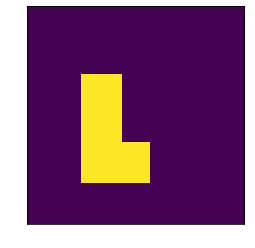

In [75]:
I = np.zeros((16,16),dtype=np.bool)
rr, cc = draw.rectangle((5, 4), extent=(5, 3), shape=I.shape)
I[rr, cc] = True
rr, cc = draw.rectangle((10, 4), extent=(3, 5), shape=I.shape)
I[rr, cc] = True
backup = I
plt.imshow(I)

In [76]:
SE = np.array([[1, 0],[1, 0],[1, 1]])
SE_o = np.array([2, 0])

In [77]:
eroded_I = np.zeros(I.shape)
dilated_I = np.zeros(I.shape)
I = np.pad(I,
           ((SE_o[0], SE_o[0]),(SE_o[1],SE_o[1])),
           mode='constant',
           constant_values=((False, False), (False, False)))

In [78]:
for i in range(SE_o[0], I.shape[0] - SE_o[0]):
    for j in range(SE_o[1], I.shape[1]- SE_o[1]):
        crop = I[i-SE_o[0]: i-SE_o[0]+SE.shape[0], j-SE_o[1]:j-SE_o[1]+SE.shape[1]]

        and_result = np.logical_and(crop,
                                    SE)
        erosion_test = np.sum(and_result) == np.sum(SE)
        dilation_test = np.sum(and_result) > 0

        eroded_I[i-SE_o[0],j-SE_o[1]] = erosion_test

        dilated_I[i-SE_o[0],j-SE_o[1]] = dilation_test

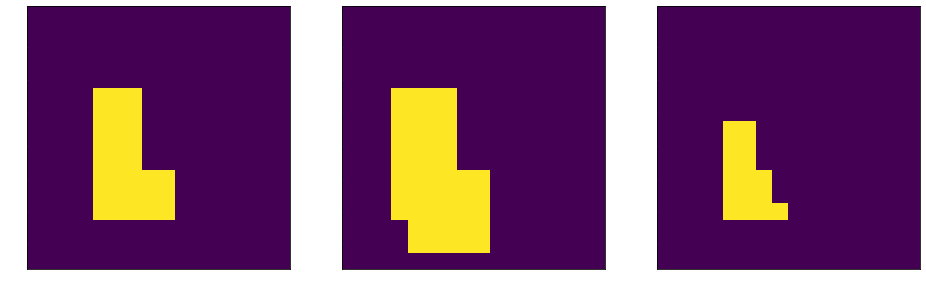

In [79]:
plt.figure(figsize=(16,10))
plt.subplot(131)
plt.imshow(backup)
plt.subplot(132)
plt.imshow(dilated_I)
plt.subplot(133)
plt.imshow(eroded_I)

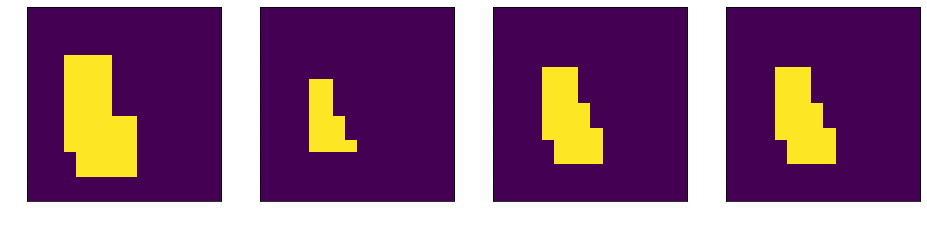

In [80]:
from skimage import morphology
#selem = morphology.selem.rectangle(3,2)

dilated_I = morphology.dilation(backup,SE)
eroded_I = morphology.erosion(backup,SE)
closed_I = morphology.closing(backup,SE)
open_I = morphology.opening(backup,SE)
plt.figure(figsize=(16,10))
plt.subplot(141)
plt.imshow(dilated_I)
plt.subplot(142)
plt.imshow(eroded_I)
plt.subplot(143)
plt.imshow(closed_I)
plt.subplot(144)
plt.imshow(open_I)

Text(0.5, 1.0, 'Otsu thresh binary mask base on blue channel')

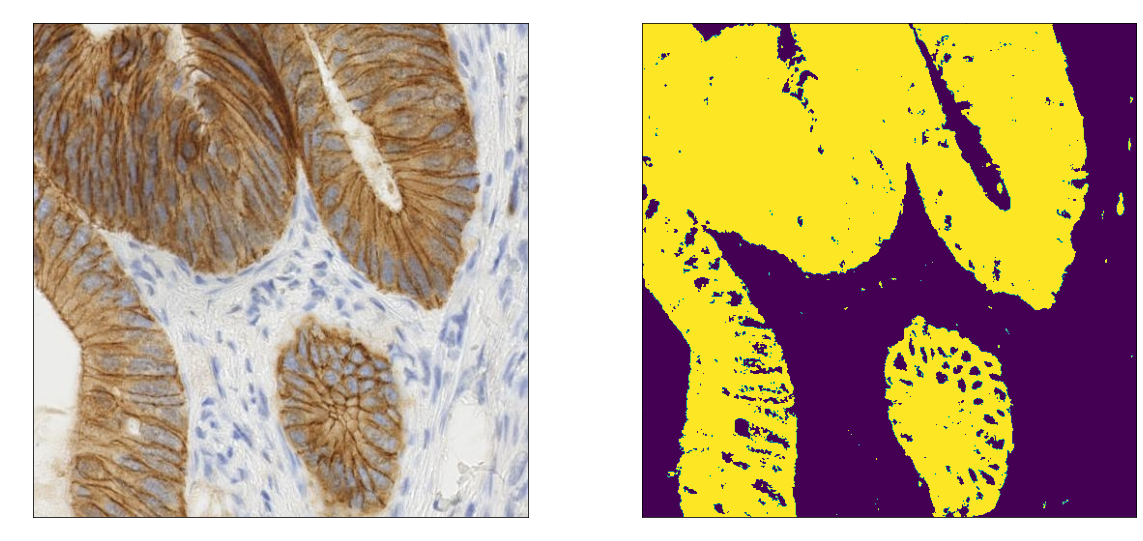

In [81]:
I3 =data.immunohistochemistry()

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(I3)
plt.title('Image')
plt.subplot(222)
B = I3[:,:,2]
out  = filters.threshold_otsu(B)
mask = B<out
plt.imshow(mask)
plt.title('Otsu thresh binary mask base on blue channel')

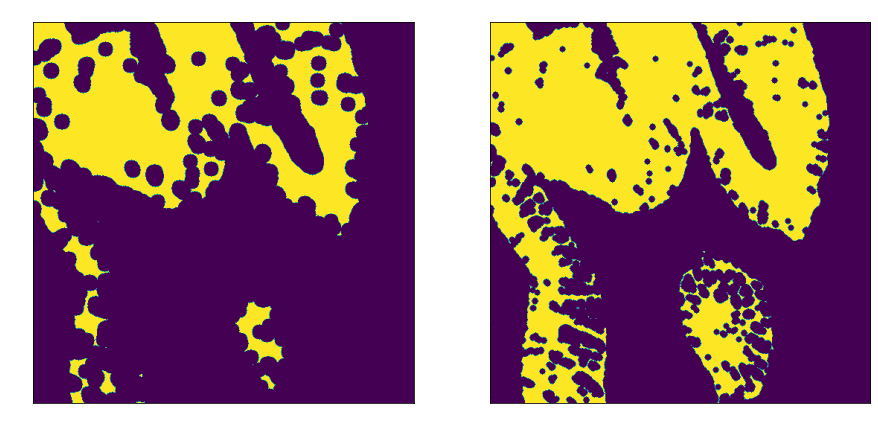

In [82]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Erosion 10 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Erosion 4 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(4)))

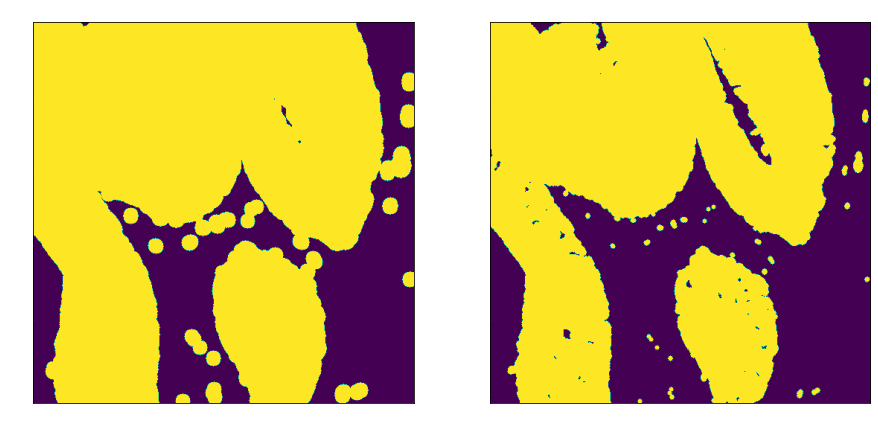

In [83]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Dilation 10 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Dilation 2 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(3)))

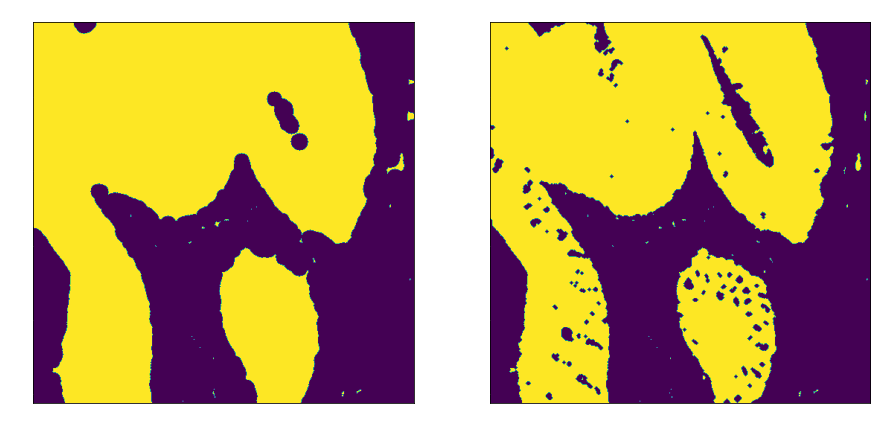

In [84]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Closing 10 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Closing 2 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(2)))

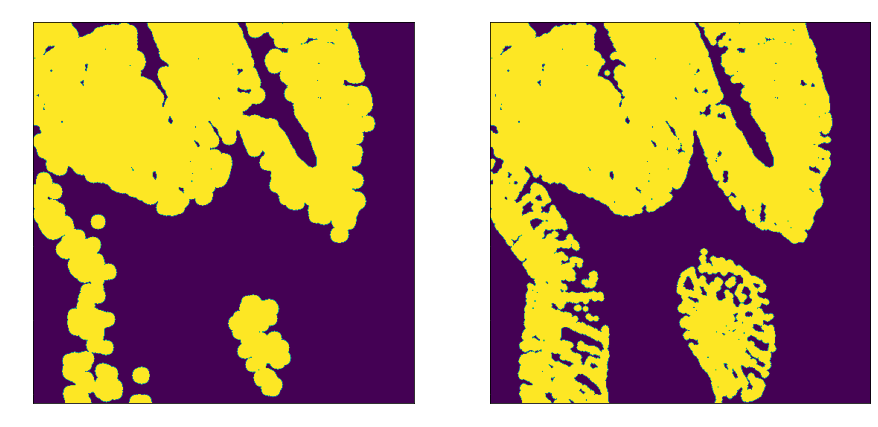

In [85]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Opening 10 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Opening 2 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(4)))

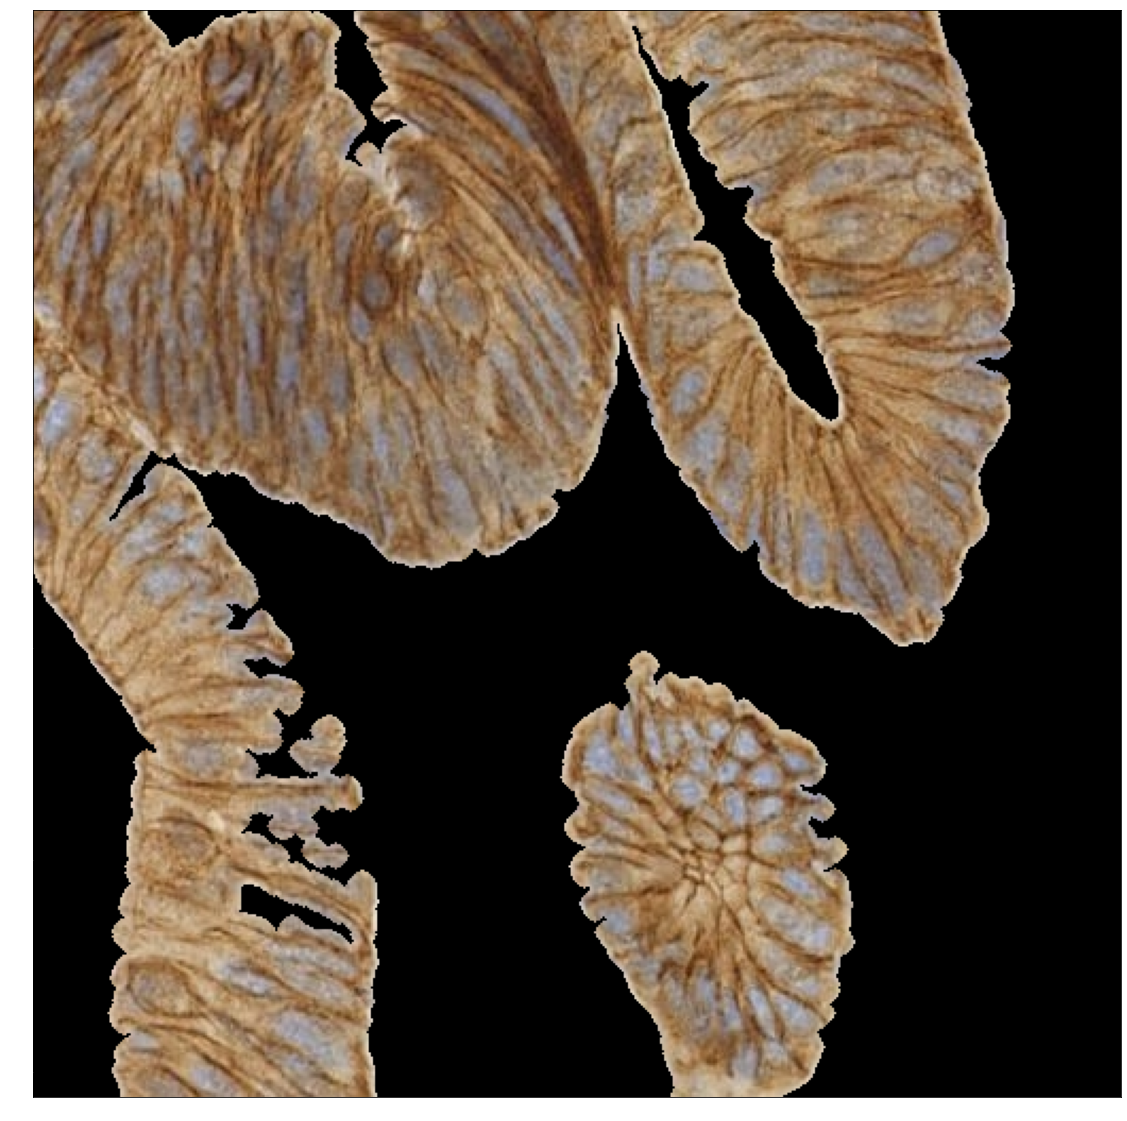

In [86]:
plt.figure(figsize=(20, 20))
mask_final = morphology.remove_small_holes(morphology.dilation(morphology.opening(mask,morphology.disk(4)),morphology.disk(2)),256)
plt.imshow(I3 * np.dstack((mask_final,mask_final,mask_final)),cmap='gray')

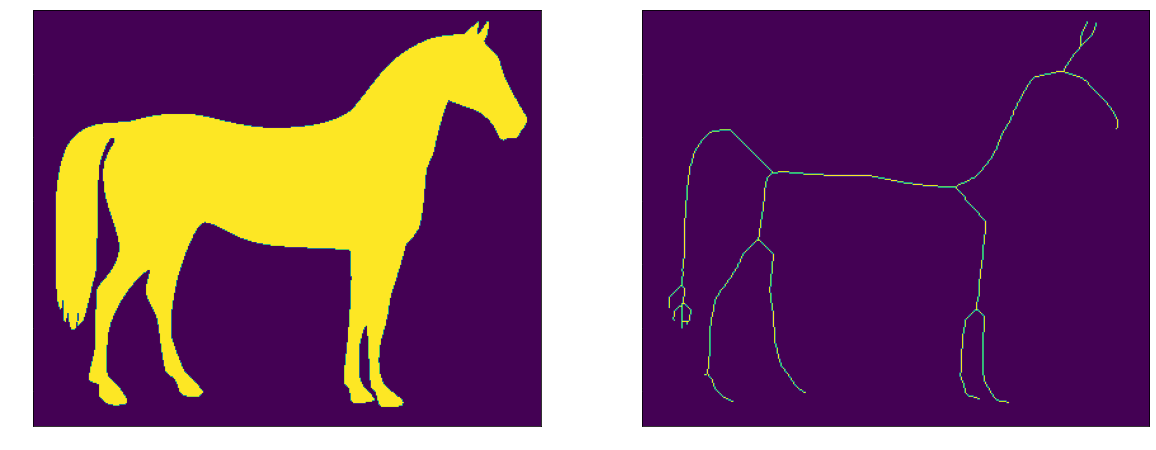

In [87]:
plt.figure(figsize=(20,15))
I = data.horse() == False
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(morphology.skeletonize(I))

Text(0.5, 1.0, 'Uzavretie square 3')

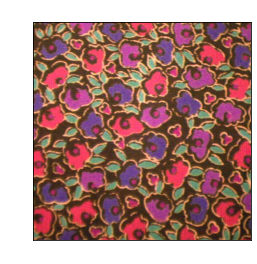

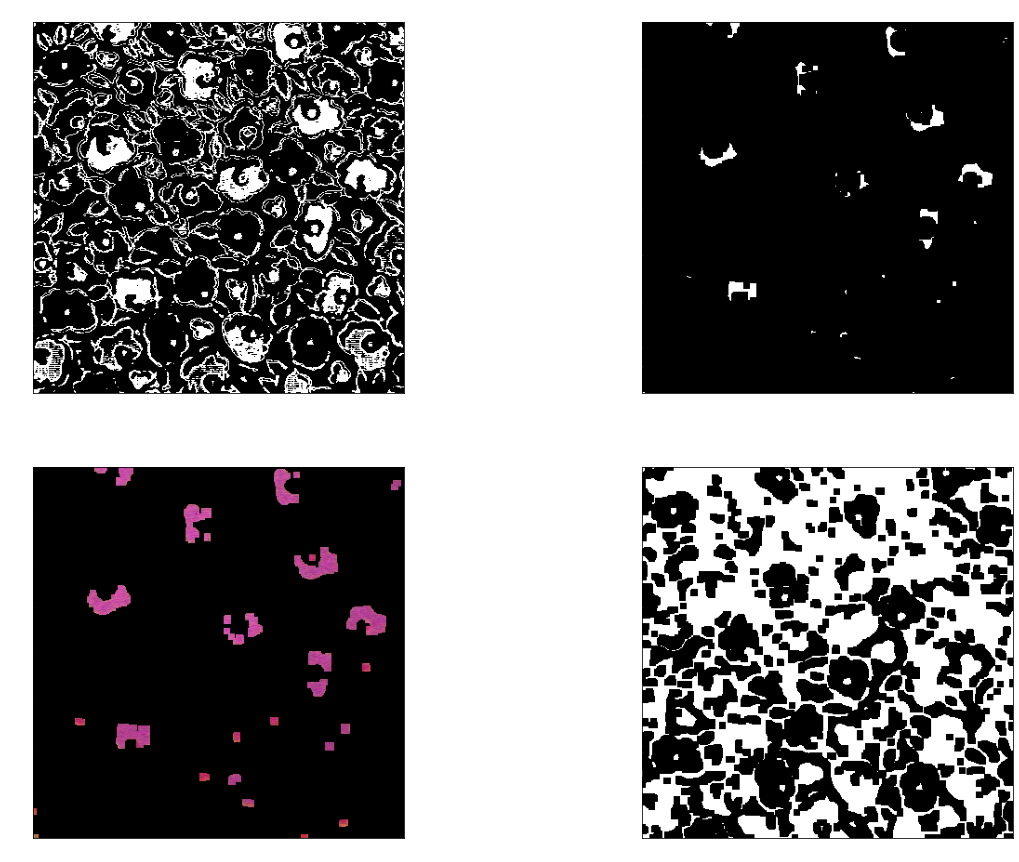

In [88]:
I = imageio.imread("./imgs/Fabric.jpg")
I = I[41:440, 121:520, :]
plt.imshow(I)
plt.title("Farebny obrazok")

plt.figure(figsize=(20,15))

I_red = I[:, :, 0]
T = np.logical_and(I_red > 155, I_red < 225)
SE = np.ones((7,7))
plt.subplot(221)
plt.title("Prahovany cerveny kanal, dva prahy")
plt.imshow(T, cmap='gray')

eroded_I = morphology.erosion(T, SE)
plt.subplot(222)
plt.imshow(eroded_I, cmap='gray')
plt.title("Erozia square 7")

open_I = morphology.opening(T, SE)
plt.subplot(223)
plt.imshow(I * np.dstack((open_I, open_I, open_I)))
plt.title("Otvorenie square 7 - farebne")

closed_I = morphology.closing(T, SE)
plt.subplot(224)
plt.imshow(closed_I, cmap='gray')
plt.title("Uzavretie square 3")

<ipython-input-89-4ababcdbbaf3>:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  I = rgb2gray(I) > 0.7


Text(0.5, 1.0, 'Skeleton')

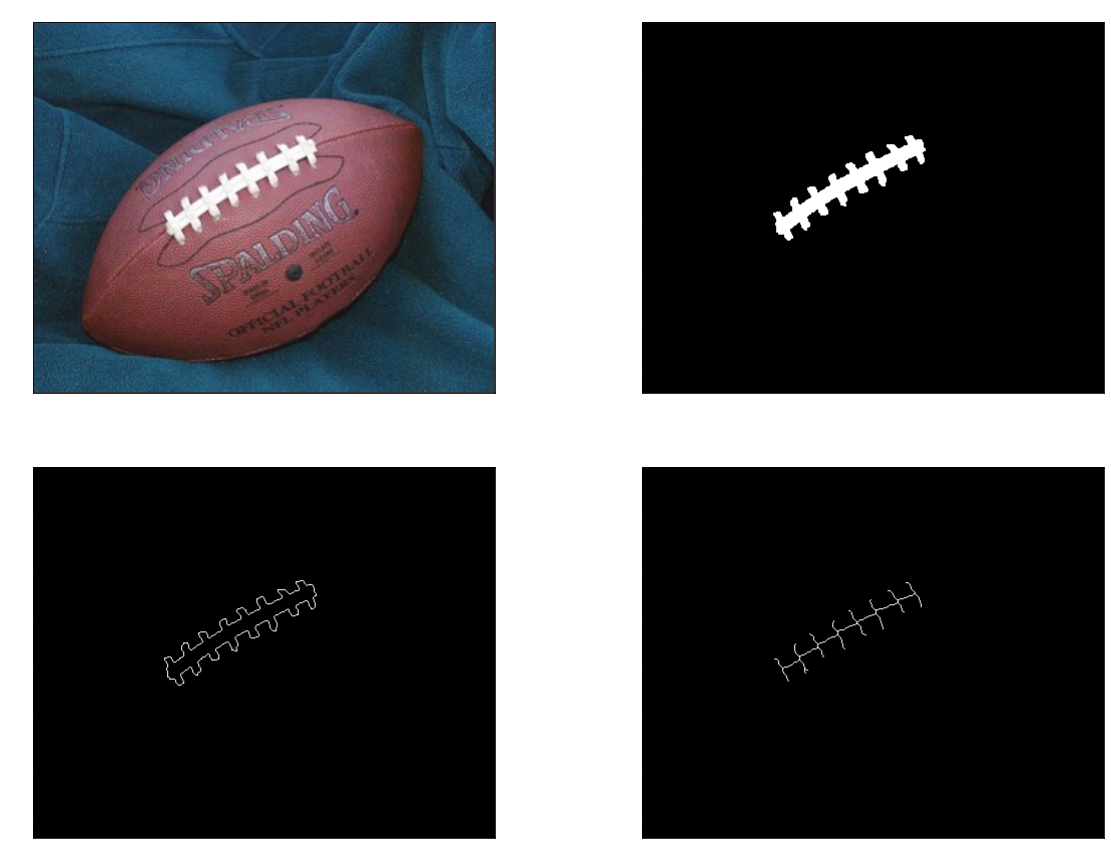

In [89]:
I = imageio.imread("./imgs/Football.png")

plt.figure(figsize=(20,15))

plt.subplot(221)
plt.imshow(I)
plt.title("Povodny obrazok")

I = rgb2gray(I) > 0.7
I1 = morphology.opening(I, morphology.square(3))
plt.subplot(222)
plt.imshow(I1,cmap='gray')
plt.title("BW")

I2 = np.logical_xor(I1, morphology.erosion(I1, morphology.disk(1)))
plt.subplot(223)
plt.imshow(I2,cmap='gray')
plt.title("BW - erozia")

I3 = morphology.skeletonize(I1)
plt.subplot(224)
plt.imshow(I3,cmap='gray')
plt.title("Skeleton")

In [90]:
SE = np.array([[1,1,1]])
I = np.random.randint(0, high=25, size=(5,5))
print ("\nDilated grayscale:\n", morphology.dilation(I,SE))
print ("\nEroded grayscale:\n", morphology.erosion(I,SE))


Dilated grayscale:
 [[19 19 24 24 24]
 [ 9 22 22 22 16]
 [22 24 24 24 24]
 [18 18 18 18 18]
 [22 22 20 19 19]]

Eroded grayscale:
 [[18  9  9  9  9]
 [ 2  2  9 13 13]
 [14 14 14 22 22]
 [ 7  6  6  6 12]
 [20  8  8  8 16]]


Text(0.5, 1.0, 'Pixely zmenene bwareopen')

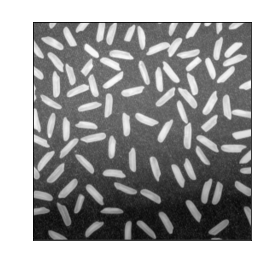

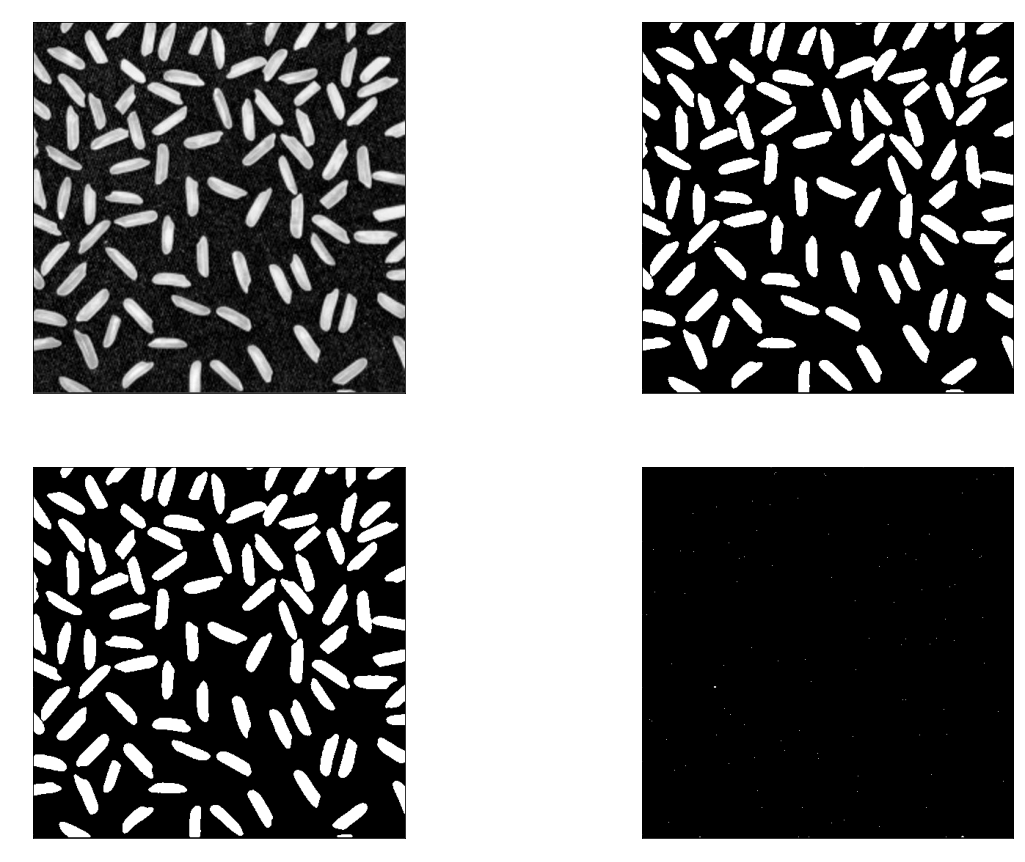

In [91]:
I = imageio.imread('./imgs/Rice.jpg')

plt.imshow(I)
plt.title("Povodny obrazok")

plt.figure(figsize=(20,15))

I = rgb2gray(I)
background = morphology.opening(I, morphology.disk(15))
I1 = I - background
plt.subplot(221)
plt.imshow(I1,cmap='gray')
plt.title("Oddelene pozadie")

thresh = threshold_otsu(I1)
I2 = I1 > thresh
plt.subplot(222)
plt.imshow(I2,cmap='gray')
plt.title("Prahovany obrazok")

I3 = morphology.opening(I2, morphology.disk(1))
plt.subplot(223)
plt.imshow(I3,cmap='gray')
plt.title("Pixely zmenene otvorenim")

I4 = np.logical_xor(I2, I3)
plt.subplot(224)
plt.imshow(I4,cmap='gray')
plt.title("Pixely zmenene bwareopen")

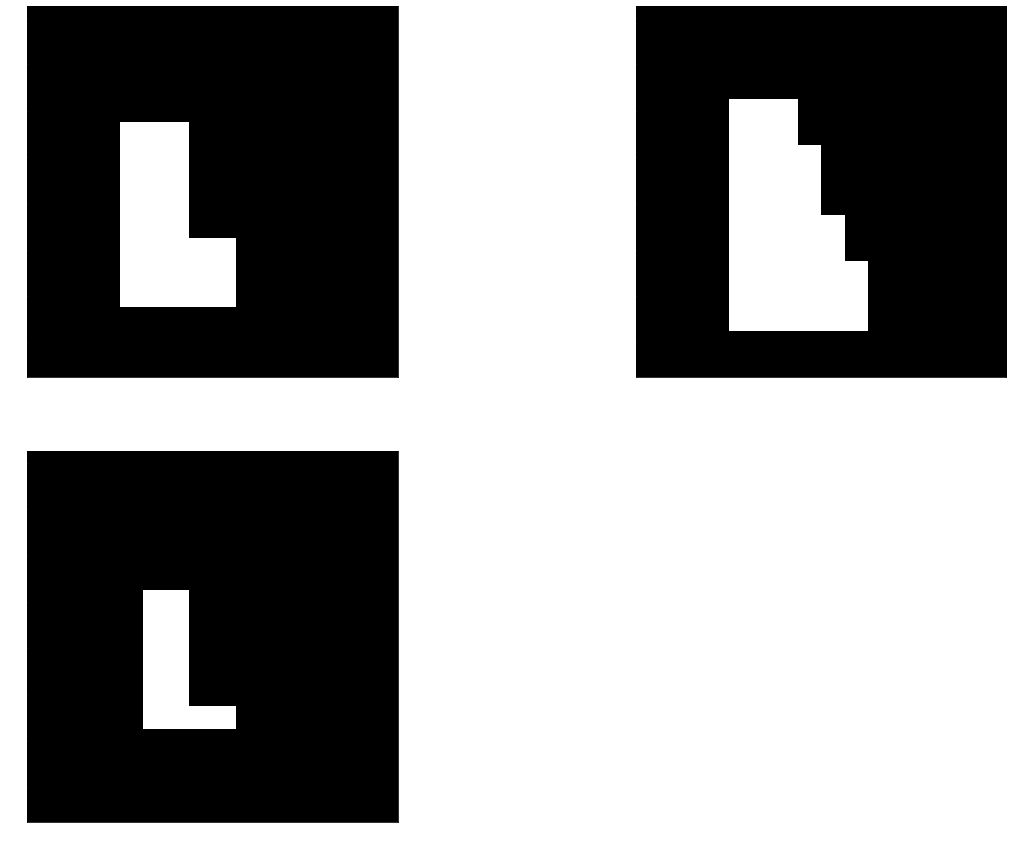

In [92]:
I = np.zeros((16,16),dtype=np.bool)
rr, cc = draw.rectangle((5, 4), extent=(5, 3), shape=I.shape)

I[rr, cc] = True
rr, cc = draw.rectangle((10, 4), extent=(3, 5), shape=I.shape)
I[rr, cc] = True
backup = I

plt.figure (figsize=(20,15))
plt.subplot(221)
plt.imshow(I, cmap='gray')

SE = np.array([[1, 0],
               [1, 0],
               [1, 1]])
SE = SE / np.sum(SE)


plt.subplot(222)
plt.imshow(signal.convolve2d(I, SE, mode='same') > np.min(I), cmap='gray')

plt.subplot(223)
plt.imshow(signal.convolve2d(I, SE, mode='same') == np.max(I), cmap='gray')